### Task 1: Factorized Approximation

Implement the Mean Field Approach.

Use following factorised variational approximation for posterior:
$$
q(\mu, \tau) = q_\mu(\mu)q_\tau(\tau)
$$

It can be shown that 
$$
q_\mu(\mu) = \mathcal{N}(\mu|\mu_N, \lambda_N^{-1}), q_\tau(\tau) = Gam(\tau|a_N, b_N)
$$

Hint: All you need is the Gaussian and Gamma distributions

##### a. Create $N=20$ 1D random samples for a Gaussian distribution $\mathcal{N}(x|\mu, \tau^{-1})$, with mean $\mu=0$ and precision $\tau=1$

In [43]:
# set random seed for reproducibility
import random
import numpy as np
seed = 10
random.seed(seed)
np.random.seed(seed)

(array([1., 3., 1., 0., 1., 6., 2., 2., 1., 3.]),
 array([-1.54540029, -1.24240656, -0.93941283, -0.6364191 , -0.33342537,
        -0.03043165,  0.27256208,  0.57555581,  0.87854954,  1.18154327,
         1.484537  ]),
 <BarContainer object of 10 artists>)

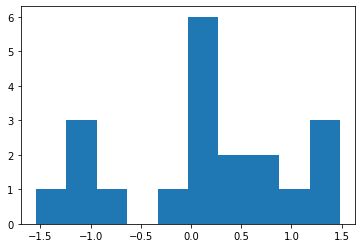

In [44]:
from matplotlib import pyplot as plt
samples = [np.random.normal(0, 1**-1) for i in range(20)]
plt.hist(samples)

##### b. Implement helper functions to evaluate $q_\tau$ and $q_\mu$

In [45]:
def E_t(a_N, b_N): 
    return a_N/b_N

def E_mu(mu_N):
    return mu_N

def E_mu2(lambda_N, mu_N):
    return 1/lambda_N + mu_N**2

##### c. Implement the following algorithm
1. Initialize: $\mu_0=0$, $\lambda_0=0$, $a_0=1$, $b_0=1$, $\text{iter}_\text{max}=50$
2. Repeat the following:
3. Update $q_\mu$: $\mu_N$ by (10.26), $\lambda_N$ by (10.27)
4. Update $q_\tau$: $a_N$ by (10.29), $b_N$ by (10.30)
5. Update $q(\mu, \tau) = q_\mu(\mu) q_\tau(\tau)$
6. Stop if: $\text{iter}>\text{iter}_\text{max}$

In [46]:
def initialize(iterations=50):
    mu_0 = 0
    lambda_0 = 0 #k0
    alpha_0 = 1
    beta_0 = 1
    iter_max = iterations
    N = len(samples)

    mu_N = 0
    lambda_N = 0 #tN
    alpha_N = 1
    beta_N = 1
initialize()

In [47]:
def mean_field_approach(iterations=50):
    #initialize
    mu_0 = 0
    lambda_0 = 0 #k0
    a_0 = 1
    b_0 = 1
    iter_max = iterations
    N = len(samples)

    mu_N = 0
    lambda_N = 0 #tN
    a_N = 1
    b_N = 1

    for i in range(iter_max):
        #3. - q_mu
        mu_N = (lambda_0*mu_0 + sum(samples)) / (lambda_0 + N) #mean - doesn't change
        lambda_N = (lambda_0 + N)*E_t(a_N, b_N) #E[t] - P(x)*X - #? - changes

        #4. - q_tau
        a_N = a_0 + N/2 #Alternative: a_0 + (N+1)/2 - doesn't change
        b_N = b_0 + lambda_0 * 0.5 * (E_mu2(lambda_N, mu_N) + mu_0**2 - 2*E_mu(mu_N)*mu_0) + 0.5 * sum([samples[i]**2 + E_mu2(lambda_N, mu_N) - 2*E_mu(mu_N)*samples[i] for i in range(N)])
    return mu_N, lambda_N, a_N, b_N
mean_field_approach()

(0.11871947891317765, 26.311764306478725, 11.0, 8.361278910735361)

##### d. How does the result change if you change the number of maximum interations? And how if 50 or 100 samples are used?

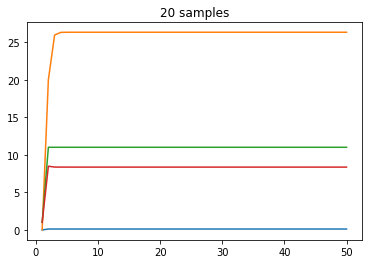

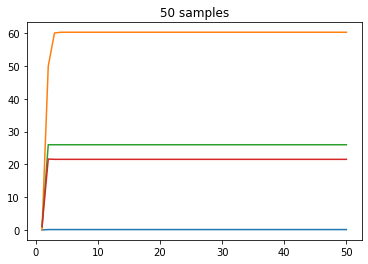

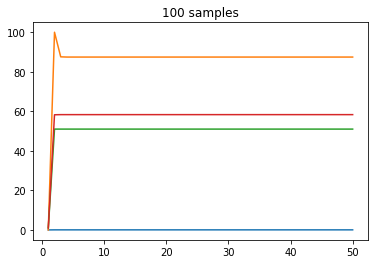

In [48]:
np.random.seed(seed)
x = np.linspace(1, 50, 50)

def plot(y, title):
    fig, axes = plt.subplots()
    axes.plot(x, [tup[0] for tup in y])
    axes.plot(x, [tup[1] for tup in y])
    axes.plot(x, [tup[2] for tup in y])
    axes.plot(x, [tup[3] for tup in y])
    axes.set_title(title)

samples = [np.random.normal(0, 1**-1) for i in range(20)]
y = [mean_field_approach(i) for i in range(len(x))]
plot(y, '20 samples')

samples = [np.random.normal(0, 1**-1) for i in range(50)]
y = [mean_field_approach(i) for i in range(len(x))]
plot(y, '50 samples')

samples = [np.random.normal(0, 1**-1) for i in range(100)]
y = [mean_field_approach(i) for i in range(len(x))]
plot(y, '100 samples')
plt.show()

##### e. Compare the true and estimated distributions by Kullback-Leibler Divergence
Note: You do not need to implement this one yourself, as we do this for the discrete case in task 2

In [ ]:
#import stats 
#p = stats.norm.pdf(np.sort(samples), 0, 1)
#q = stats.norm.pdf(np.sort(samples))

##### f. You can plot your findings by plotting the true and approximated posterior in the parameter plane, i.e. $x$-axis $\mu$, $y$-axis $\tau$

In [49]:
#plot

##### g. What are sensible additional stopping criteria? Choose one and implement it. Monitor it during the iteration

A threshold for change in the parameters -> if below some amount of change pr iteration - stop

### Task 2: Kullback-Leibler Divergence

$$
f(x|p) = p^x(1-p)^{1-x}
$$

##### a. Compute $KL(f(x|p_1)||f(x|p_2))$, and $KL(f(x|p_2)||f(x|p_1))$ for $p_1=0.4$, $p_2=0.8$ without toolboxes. Keep in mind to only sum over the set of possible realisations $x\in\{0,1\}$

$$
KL(q||p) = \sum_{x=0}^1 q(x)ln \left[ \frac{q(x)}{p(x)} \right]
$$

$$
KL(f(x|p_1)||f(x|p_2)) = \sum_{x=0}^1 f(x|p_1) \left[ \frac{f(x|p_1)}{f(x|p_2)} \right]
= \sum_{x=0}^1 p_1^x(1-p_1)^{1-x} ln \left[ \frac{p_1^x(1-p_1)^{1-x}} {p_2^x(1-p_2)^{1-x}} \right]
$$

$$
KL(f(x|0.4)||f(x|0.8))= \sum_{x=0}^1 0.4^x \cdot 0.6^{1-x} ln \left[ \frac{0.4^x \cdot 0.6^{1-x}} {0.8^x \cdot 0.2^{1-x}} \right]
= 0.6 ln \left[ \frac{0.6}{0.2} \right] + 0.4 ln \left[ \frac{0.4}{0.8} \right]
$$

$$
= 0.6 ln(3) + 0.4 ln(0.5) = 0.659 - 0.277 = 0.382
$$

$$
KL(f(x|p_2)||f(x|p_1)) = \sum_{x=0}^1 f(x|p_2) \left[ \frac{f(x|p_2)}{f(x|p_1)} \right] = \sum_{x=0}^1 p_2^x(1-p_2)^{1-x} ln \left[ \frac{p_2^x(1-p_2)^1-x}{p_1^x(1-p_1)^{1-x}} \right]
$$

$$
KL(f(x|0.8)||f(x|0.4)) = \sum_{x=0}^1 0.8^x \cdot 0.2^{1-x} ln \left[ \frac{0.8^x \cdot 0.2^{1-x}} {0.4^x \cdot 0.6^{1-x}} \right] = 0.8 ln \left[ \frac{0.8}{0.4} \right] + 0.2 ln \left[ \frac{0.2}{0.6} \right]
$$

$$
0.8 ln(2) + 0.2 ln (\frac{1}{3}) = 0.5545 - 0.2197 = 0.3348
$$

##### b. Compute $KL(f(x|p_1)||f(x|p_2))$, and $KL(f(x|p_2)||f(x|p_1))$ for $p_1=0.4$ by varying $p_2$. Plot your results, with $p_2$ on the $x$-axis and $KL(\cdot||\cdot)$ on the $y$-axis. (Do not use a toolbox or package for this, i.e. implement the discrete KL Divergence by yourself)

In [50]:
def f(x, p):
    return p**x * (1-p)**(1-x)

In [51]:
import math 
def KL(p1, p2):
    sum = 0.0
    for x in range(0, 2):
        sum += f(x, p1) * math.log(f(x, p1)/f(x, p2))
    return sum

In [52]:
#verify 2.a
print(KL(0.4, 0.8))
print(KL(0.8, 0.4))

0.3819085009768877
0.33479528671433423


Text(0.5, 1.0, 'KL(f(x|p_2)||f(x|p_1))')

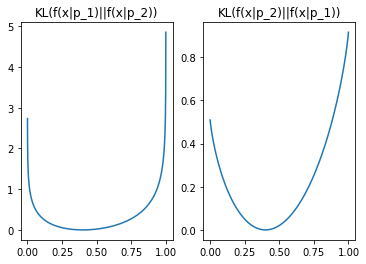

In [53]:
import numpy as np
from matplotlib import pyplot as plt
#x_list = np.linspace(0, 1, 10000)
x_list = np.linspace(1, 0, 10000, endpoint=False)[1:-1] #exclude 1 and 0 for p2
p1 = 0.4

y_list1 = [KL(p1, p2) for p2 in x_list]
y_list2 = [KL(p2, p1) for p2 in x_list]

fig, axes = plt.subplots(1,2)
axes[0].plot(x_list, y_list1)
axes[0].set_title("KL(f(x|p_1)||f(x|p_2))")

axes[1].plot(x_list, y_list2)
axes[1].set_title("KL(f(x|p_2)||f(x|p_1))")

### Task 3: Understand and Implement Autoencoders

##### a. Use a Deep Learning framework, e.g. feedforward NN, CNN, of your choice to construct a convolutional autoencoder that


1. Takes an image from the MNIST fashion dataset as input
2. produces a representation in latent space, and
3. attempts to reconstruct the original image as precisely as possible

In [212]:
#imports 
from matplotlib import pyplot as plt
from torchvision import datasets, transforms
import torch
from torch import nn, optim
from tqdm import tqdm
import numpy as np

data = datasets.FashionMNIST('../data', train=True, download=True, transform=transforms.ToTensor())
dataloader = torch.utils.data.DataLoader(data, batch_size=128, shuffle=True, num_workers=2)
test_data = datasets.FashionMNIST('../data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True, num_workers=2)
device = torch.device('mps:0' if torch.backends.mps.is_available else 'cpu')

In [213]:
#Define Model
class Model(nn.Module):
    def __init__(self, activation_func=torch.relu):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(24*24*32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 128)
        self.fc4 = nn.Linear(128, 24*24*32)
        self.deconv1 = nn.ConvTranspose2d(32, 16, 3, 1)
        self.deconv2 = nn.ConvTranspose2d(16, 1, 3, 1)
        self.activation_func = activation_func

    def encode(self, x):
        z = self.conv1(x)
        z = self.activation_func(z)
        z = self.conv2(z)
        z = self.activation_func(z)
        z = torch.flatten(z, 1)
        z = self.fc1(z)
        z = self.activation_func(z)
        z = self.fc2(z)
        return z

    def decode(self, z):
        x = self.fc3(z)
        x = self.activation_func(x)
        x = self.fc4(x)
        x = self.activation_func(x)
        x = x.view(x.shape[0], 32, 24, 24)
        x = self.deconv1(x)
        x = self.activation_func(x)
        x = self.deconv2(x)
        x = torch.sigmoid(x)
        return x

    def forward(self, x):
        z = self.encode(x)
        x = self.decode(z)
        return x

In [214]:
#Define training
def train(model, dataloader, optimizer, criterion, epochs):
    for epoch in range(epochs):
        train_running_loss = 0.0
        i = 0
        #for x, _ in tqdm(dataloader):
        for x, _ in dataloader:
            i += 1
            x = x.to(device)
            optimizer.zero_grad() #reset gradient - clear x.grad for all parameters
            x_hat = model(x) #predict
            loss = criterion(x_hat, x) #calculate the loss/error
            loss.backward() #computes loss for each parameter - x.grad +=dloss/dx
            optimizer.step() #optimize according to loss - updates values using gradient - x+= -lr * x.grad

            train_running_loss += loss.detach().item()
        print('Epoch: %d | Loss: %.4f' \
          %(epoch, train_running_loss / i))
    return model, (train_running_loss/i)

In [228]:
model = Model()
model = model.to(device)
lr = 0.001
epochs = 10
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()
(model, _) = train(model, dataloader, optimizer, criterion, epochs)

Epoch: 0 | Loss: 0.0238
Epoch: 1 | Loss: 0.0125
Epoch: 2 | Loss: 0.0107
Epoch: 3 | Loss: 0.0097
Epoch: 4 | Loss: 0.0090
Epoch: 5 | Loss: 0.0086
Epoch: 6 | Loss: 0.0082
Epoch: 7 | Loss: 0.0079
Epoch: 8 | Loss: 0.0077
Epoch: 9 | Loss: 0.0074


In [229]:
#Save model
torch.save(model.state_dict(), 'model_fasion.pth')

Output/decoded images of random encoded images

[[0.11  0.06  0.03  0.016 0.012 0.028 0.048 0.093 0.158 0.207 0.3   0.35
  0.337 0.342 0.34  0.37  0.389 0.414 0.394 0.355 0.297 0.247 0.185 0.107
  0.085 0.061 0.086 0.11 ]
 [0.033 0.007 0.002 0.001 0.002 0.008 0.017 0.091 0.184 0.286 0.42  0.434
  0.438 0.407 0.408 0.512 0.493 0.53  0.51  0.483 0.431 0.265 0.141 0.043
  0.016 0.009 0.015 0.03 ]
 [0.01  0.001 0.001 0.001 0.001 0.003 0.013 0.082 0.227 0.383 0.488 0.41
  0.309 0.273 0.32  0.418 0.451 0.511 0.518 0.516 0.424 0.272 0.115 0.017
  0.004 0.002 0.003 0.009]
 [0.002 0.    0.    0.    0.    0.002 0.012 0.065 0.186 0.38  0.448 0.372
  0.244 0.154 0.227 0.231 0.408 0.53  0.516 0.519 0.517 0.294 0.128 0.009
  0.002 0.001 0.001 0.01 ]
 [0.002 0.    0.    0.    0.    0.001 0.01  0.082 0.222 0.476 0.483 0.352
  0.251 0.184 0.219 0.284 0.442 0.535 0.525 0.559 0.512 0.308 0.121 0.012
  0.002 0.001 0.002 0.015]
 [0.01  0.    0.    0.    0.    0.002 0.026 0.121 0.3   0.408 0.389 0.288
  0.199 0.131 0.192 0.211 0.371 0.448 0.521 0.514 0.5

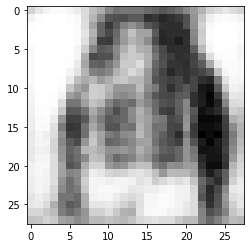

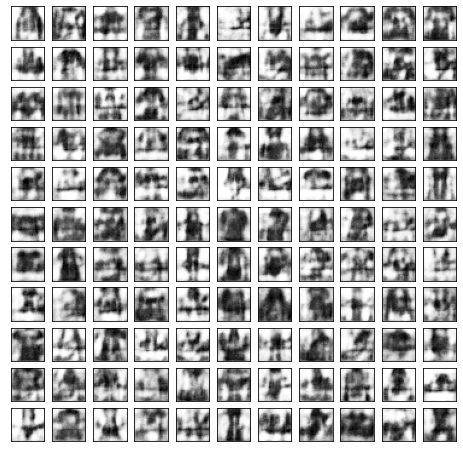

In [217]:
#plot
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
#model.load_state_dict(torch.load('model.pth'))
model.eval()
z = torch.randn(128, 32) #batch * input size at inner layer
imgs = model.decode(z.to(device)).cpu().detach().reshape(-1, 28, 28).detach().numpy()

fix, ax = plt.subplots()
ax.imshow(imgs[0], cmap='binary')

def plot(imgs, n): #plots batch# of decoded images from random encoded values
    dim = int(np.sqrt(n))
    fig, axes = plt.subplots(dim, dim, figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(imgs[i], cmap='binary')
        ax.set(xticks=[], yticks=[])
    plt.show()
plot(imgs, imgs.shape[0])

##### b. Use different bottleneck characteristics (sizes and filter properties, (non)-linear activation function). How do the reconstructions compare?

In [218]:
#def initialize_optimizer(type, lr, momentum)
from functools import partial

def partial_adam(parameters, lr):
    return optim.Adam(model.parameters(), lr=lr)

def partial_sgd(parameters, lr, momentum):
    return optim.SGD(model.parameters(), lr=lr, momentum=momentum)

In [219]:
def calculate_test_acc(model):
    test_acc = 0.0
    with torch.no_grad():
        i = 0
        for (x, _) in test_loader: #tqdm(dataloader):
            i += 1
            y = model.forward(x.to(device)).cpu().detach().numpy()
            error = ((x-y)**2).mean() #mse
            test_acc += error
        return test_acc/i

In [220]:
#setup loops to test with different hyperparameters
import itertools
import pandas as pd
df = pd.DataFrame(columns=['lr', 'activation_func', 'criterion', 'optimizer', 'train_acc', 'test_acc'])

epochs = 2
lrs = [0.001, 0.005]
activation_functions = [torch.relu, torch.tanh]
criterions = [nn.MSELoss(), nn.L1Loss()]
optimizers = [partial(partial_adam), partial(partial_sgd, momentum=0.9)]

#Would be nice to check different filter sizes - kernels
#check fully connected network as well as CNN - plus maybe also an VAE

for (lr, activation_func, criterion, partial_optimizer) in itertools.product(lrs, activation_functions, criterions, optimizers):
    model = Model(activation_func)
    model = model.to(device)
    optimizer = partial_optimizer(model.parameters(), lr=lr)
    #optimizers = [optim.Adam(model.parameters(), lr=lr), optim.SGD(model.parameters(), lr=lr, momentum=0.9)]

    print('starting training on : lr: %.4f | activation_func: %s | criterion: %s | optimizer: %s' %(lr, activation_func.__name__, criterion, optimizer.__class__.__name__))
    (model, train_acc) = train(model, dataloader, optimizer, criterion, epochs)
    test_acc = calculate_test_acc(model)

    print('finished training on : lr: %.4f | activation_func: %s | criterion: %s | optimizer: %s | train_acc: %.4f | test_acc: %.4f' \
        %(lr, activation_func.__name__, criterion, optimizer.__class__.__name__, train_acc, test_acc))
    
    df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)
    df.to_pickle('AE_models_fashion.pkl')

starting training on : lr: 0.0010 | activation_func: relu | criterion: MSELoss() | optimizer: Adam
Epoch: 0 | Loss: 0.0281
Epoch: 1 | Loss: 0.0142
finished training on : lr: 0.0010 | activation_func: relu | criterion: MSELoss() | optimizer: Adam | train_acc: 0.0142 | test_acc: 0.0131
starting training on : lr: 0.0010 | activation_func: relu | criterion: MSELoss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.1420
Epoch: 1 | Loss: 0.1341
finished training on : lr: 0.0010 | activation_func: relu | criterion: MSELoss() | optimizer: SGD | train_acc: 0.1341 | test_acc: 0.1324
starting training on : lr: 0.0010 | activation_func: relu | criterion: L1Loss() | optimizer: Adam


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.0921
Epoch: 1 | Loss: 0.0569
finished training on : lr: 0.0010 | activation_func: relu | criterion: L1Loss() | optimizer: Adam | train_acc: 0.0569 | test_acc: 0.0135
starting training on : lr: 0.0010 | activation_func: relu | criterion: L1Loss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.3628
Epoch: 1 | Loss: 0.3302
finished training on : lr: 0.0010 | activation_func: relu | criterion: L1Loss() | optimizer: SGD | train_acc: 0.3302 | test_acc: 0.1533
starting training on : lr: 0.0010 | activation_func: tanh | criterion: MSELoss() | optimizer: Adam


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.0230
Epoch: 1 | Loss: 0.0124
finished training on : lr: 0.0010 | activation_func: tanh | criterion: MSELoss() | optimizer: Adam | train_acc: 0.0124 | test_acc: 0.0114
starting training on : lr: 0.0010 | activation_func: tanh | criterion: MSELoss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.1428
Epoch: 1 | Loss: 0.1314
finished training on : lr: 0.0010 | activation_func: tanh | criterion: MSELoss() | optimizer: SGD | train_acc: 0.1314 | test_acc: 0.1278
starting training on : lr: 0.0010 | activation_func: tanh | criterion: L1Loss() | optimizer: Adam


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.0922
Epoch: 1 | Loss: 0.0600
finished training on : lr: 0.0010 | activation_func: tanh | criterion: L1Loss() | optimizer: Adam | train_acc: 0.0600 | test_acc: 0.0135
starting training on : lr: 0.0010 | activation_func: tanh | criterion: L1Loss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.3538
Epoch: 1 | Loss: 0.3191
finished training on : lr: 0.0010 | activation_func: tanh | criterion: L1Loss() | optimizer: SGD | train_acc: 0.3191 | test_acc: 0.1402
starting training on : lr: 0.0050 | activation_func: relu | criterion: MSELoss() | optimizer: Adam


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.0218
Epoch: 1 | Loss: 0.0127
finished training on : lr: 0.0050 | activation_func: relu | criterion: MSELoss() | optimizer: Adam | train_acc: 0.0127 | test_acc: 0.0121
starting training on : lr: 0.0050 | activation_func: relu | criterion: MSELoss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.1376
Epoch: 1 | Loss: 0.0927
finished training on : lr: 0.0050 | activation_func: relu | criterion: MSELoss() | optimizer: SGD | train_acc: 0.0927 | test_acc: 0.0721
starting training on : lr: 0.0050 | activation_func: relu | criterion: L1Loss() | optimizer: Adam


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.0794
Epoch: 1 | Loss: 0.0551
finished training on : lr: 0.0050 | activation_func: relu | criterion: L1Loss() | optimizer: Adam | train_acc: 0.0551 | test_acc: 0.0130
starting training on : lr: 0.0050 | activation_func: relu | criterion: L1Loss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.3255
Epoch: 1 | Loss: 0.3032
finished training on : lr: 0.0050 | activation_func: relu | criterion: L1Loss() | optimizer: SGD | train_acc: 0.3032 | test_acc: 0.1879
starting training on : lr: 0.0050 | activation_func: tanh | criterion: MSELoss() | optimizer: Adam


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.0340
Epoch: 1 | Loss: 0.0217
finished training on : lr: 0.0050 | activation_func: tanh | criterion: MSELoss() | optimizer: Adam | train_acc: 0.0217 | test_acc: 0.0213
starting training on : lr: 0.0050 | activation_func: tanh | criterion: MSELoss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.1252
Epoch: 1 | Loss: 0.0749
finished training on : lr: 0.0050 | activation_func: tanh | criterion: MSELoss() | optimizer: SGD | train_acc: 0.0749 | test_acc: 0.0593
starting training on : lr: 0.0050 | activation_func: tanh | criterion: L1Loss() | optimizer: Adam


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.1196
Epoch: 1 | Loss: 0.0851
finished training on : lr: 0.0050 | activation_func: tanh | criterion: L1Loss() | optimizer: Adam | train_acc: 0.0851 | test_acc: 0.0280
starting training on : lr: 0.0050 | activation_func: tanh | criterion: L1Loss() | optimizer: SGD


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


Epoch: 0 | Loss: 0.3152
Epoch: 1 | Loss: 0.2149
finished training on : lr: 0.0050 | activation_func: tanh | criterion: L1Loss() | optimizer: SGD | train_acc: 0.2149 | test_acc: 0.0827


/var/folders/gr/v_6cxqhs7m5d538mpxzczl140000gn/T/ipykernel_63658/4166733403.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lr': lr, 'activation_func': activation_func.__name__, 'criterion': criterion.__class__.__name__, 'optimizer': optimizer.__class__.__name__, 'train_acc': train_acc, 'test_acc': test_acc.cpu().detach().numpy()}, ignore_index=True)


In [221]:
df1 = df
df = pd.read_pickle("AE_models_fashion.pkl")
print(df)

       lr activation_func criterion optimizer  train_acc     test_acc
0   0.001            relu   MSELoss      Adam   0.014214  0.013106653
1   0.001            relu   MSELoss       SGD   0.134061   0.13237438
2   0.001            relu    L1Loss      Adam   0.056864  0.013519023
3   0.001            relu    L1Loss       SGD   0.330244   0.15330261
4   0.001            tanh   MSELoss      Adam   0.012370  0.011419182
5   0.001            tanh   MSELoss       SGD   0.131446   0.12782831
6   0.001            tanh    L1Loss      Adam   0.060043  0.013473355
7   0.001            tanh    L1Loss       SGD   0.319089   0.14023551
8   0.005            relu   MSELoss      Adam   0.012660  0.012053854
9   0.005            relu   MSELoss       SGD   0.092739   0.07212276
10  0.005            relu    L1Loss      Adam   0.055112  0.013047069
11  0.005            relu    L1Loss       SGD   0.303172   0.18794164
12  0.005            tanh   MSELoss      Adam   0.021695   0.02130376
13  0.005           

##### c. How do the AE results compare to the PCA results in terms of visual results and reconstruction error?

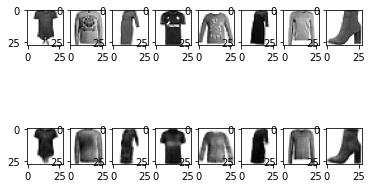

In [263]:
#plot input and output of VA
fig, ax = plt.subplots(2, 8)

#images, _ = next(iter(dataloader))
images, _ = next(iter(test_loader))
#model.load_state_dict(torch.load('model.pth'))
model.load_state_dict(torch.load('model_fasion.pth'))
y = model.forward(images.to(device)).cpu().detach().numpy()
images_1 = (images.cpu().detach().numpy()*255).astype(np.uint8)
y_1 = (y*255).astype(np.uint8)
#error_ae = ((images-y)**2).mean() #mse
#accuracy_ae = np.sum(images == y) / len(y.flatten())
error_ae = ((images_1-y_1)**2).mean()
accuracy_ae = np.sum(images_1 == y_1) / len(y_1.flatten())
for i in range(8):
    image = images[i].reshape(28,28)
    ax[0][i].imshow(image, cmap='binary')
    ax[1][i].imshow(y[i].reshape(28,28), cmap='binary')
plt.show()

torch.Size([128, 784])


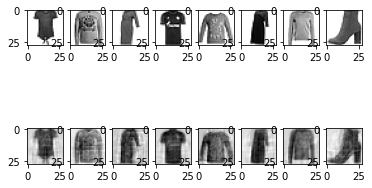

In [280]:
#compare to PCA - plot the same for PCA
from sklearn.decomposition import PCA
fig, ax = plt.subplots(2, 8)
pca = PCA(n_components=32)

flat_image = images.reshape(128, -1)
print(flat_image.shape)
pca.fit(flat_image)
z = pca.transform(flat_image)
x = pca.inverse_transform(z)

x_1 = (x*255).astype(np.uint8)
flat_image_1 = (flat_image.cpu().detach().numpy()*255).astype(np.uint8)

#error_pca = ((flat_image-x)**2).mean() #mse
#accuracy_pca = np.sum(flat_image == x) / len(x)
error_pca = ((flat_image_1-x_1)**2).mean()
accuracy_pca = np.sum(flat_image_1 == x_1) / len(x_1.flatten())

for i in range(8):
    image = images[i].reshape(28,28)
    ax[0][i].imshow(image, cmap='binary')
    ax[1][i].imshow(x[i].reshape(28,28), cmap='binary')
plt.show()

It seems like the network is able in learning that all numbers are relatively centered and a lot of pixels therefore always should be 0. This is opposite of PCA which only mathematically tries to find the most relevant dimensions to represent the numbers which somehow results in most unrelevant pixels being some kind of gray instead of flat white. 

We also see the network actually showing some form of random number-looking images when given a completely random encoding -> implying that the encodings is only able in representing number like images which it then is does quite well. Meaning given something completely different image, it wouldn't be able to encode/decode that well.

In [279]:
print('AE: mse of batch: ', error_ae)
print('pca: mse of batch: ', error_pca)
print('accuracy: AE: ', accuracy_ae*100)
print('accuracy: pca: ', accuracy_pca*100)

AE: mse of batch:  44.287876674107146
pca: mse of batch:  4.912796954719388
accuracy: AE:  43.777901785714285
accuracy: pca:  49.31939572704081
